## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = Path("./Resources/bitstamp.csv")
bitstamp = pd.read_csv(bitstamp, parse_dates=True, infer_datetime_format=True)
bitstamp = bitstamp.set_index("Timestamp")

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = Path("./Resources/coinbase.csv")
coinbase = pd.read_csv(coinbase, parse_dates=True, infer_datetime_format=True)
coinbase = coinbase.set_index("Timestamp")

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.isna().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
bitstamp = bitstamp.dropna().copy()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$", "")
bitstamp["Close"]

C:\Users\ychuk\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00     13620.0
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Retrieve data types
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [10]:
# Convert the Close data type to a float
bitstamp["Close"] = bitstamp["Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

In [12]:
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
coinbase.dropna()
coinbase = coinbase.fillna(0)
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [14]:
coinbase.loc[:,"Close"]= coinbase.loc[:,"Close"].str.replace("$","")

# check the data type of column price
coinbase.dtypes

C:\Users\ychuk\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [15]:
coinbase["Close"] = coinbase["Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [16]:
coinbase.duplicated().sum()

217

In [17]:
coinbase = coinbase.drop_duplicates()
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [19]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [20]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [21]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129323.000000,129323.000000,129323.000000,129322.000000,129323.000000,1.293230e+05,129323.000000
mean,10449.132385,10456.037661,10441.791505,10449.140958,15.666435,1.572552e+05,10448.883332
std,2317.367867,2317.883801,2316.743603,2317.197419,27.481575,2.667872e+05,2317.340347
min,0.000000,0.000000,0.000000,5882.310000,0.000000,0.000000e+00,0.000000
25%,8609.210000,8613.870000,8603.495000,8609.230000,2.999069,3.071205e+04,8609.113238
50%,10137.380000,10145.880000,10127.870000,10137.440000,7.092543,7.461146e+04,10136.032785
75%,11397.515000,11400.000000,11390.000000,11397.237500,16.954254,1.754525e+05,11396.968282
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Line Plot'}, xlabel='Timestamp'>

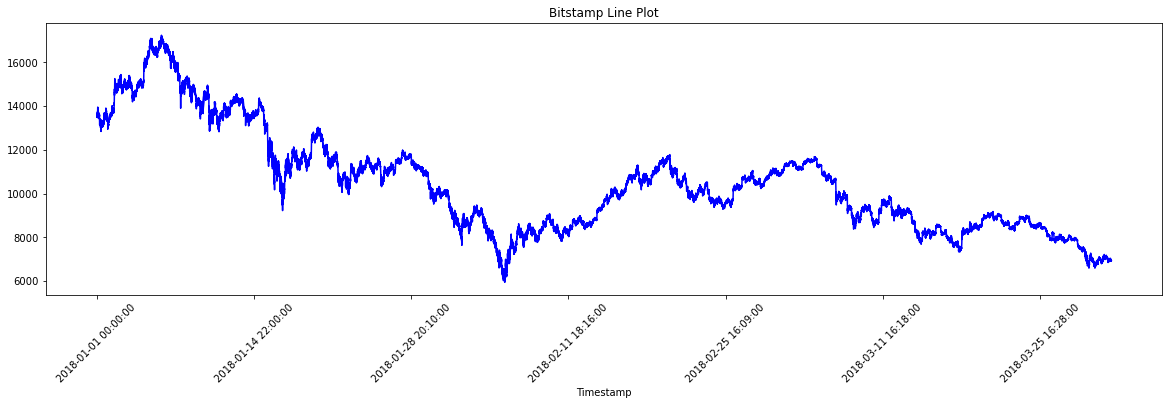

In [22]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp["Close"].plot(figsize=(20,5), title="Bitstamp Line Plot", color="blue", rot = 45)

<AxesSubplot:title={'center':'Coinbase Line Plot'}, xlabel='Timestamp'>

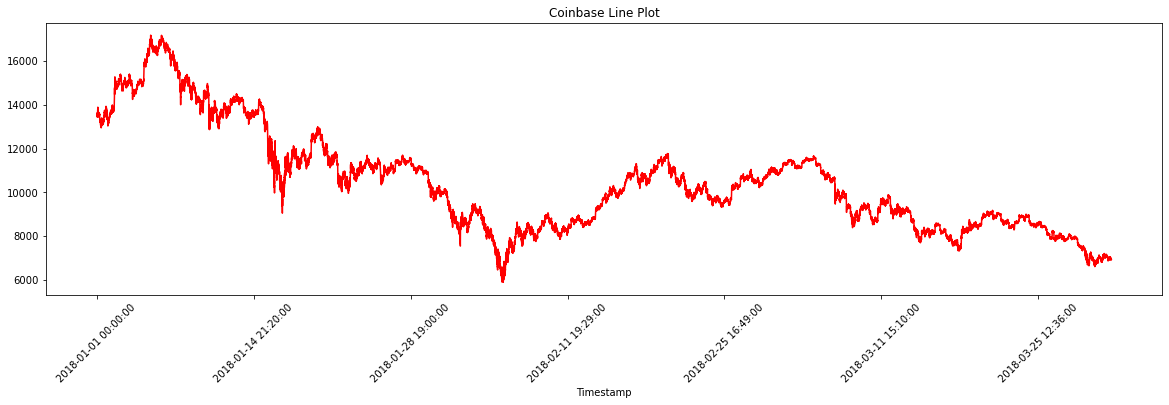

In [23]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase["Close"].plot(figsize=(20,5), title="Coinbase Line Plot", color="red", rot = 45)

<AxesSubplot:title={'center':'Bitstamp & Coinbase Overlay Plot'}, xlabel='Timestamp'>

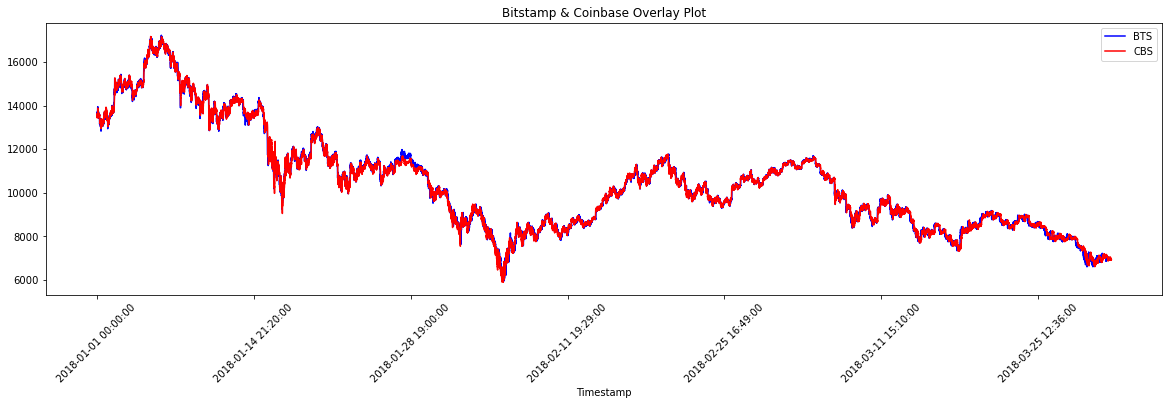

In [24]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].plot(legend = True, figsize=(20,5), title="Bitstamp & Coinbase Overlay Plot", color="blue", label="BTS")
coinbase["Close"].plot(legend = True, figsize=(20,5), color="red", label="CBS", rot = 45)
#ax = bitstamp["Close"].plot(color="blue")
#coinbase["Close"].plot(figsize=(10,5), color="red", ax=ax, rot = 45)
#ax.legend(["BTS","CBS"])

<AxesSubplot:title={'center':'1st month Bitstamp & Coinbase Overlay Plot'}, xlabel='Timestamp'>

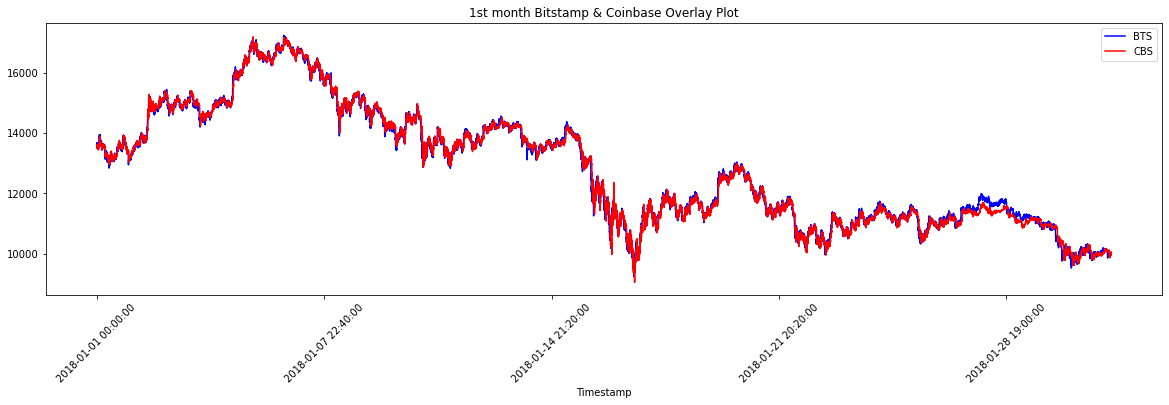

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].loc["2018-01-01":"2018-02-01"].plot(legend = True, figsize=(20,5), title="1st month Bitstamp & Coinbase Overlay Plot", color="blue", label="BTS")
coinbase["Close"].loc["2018-01-01":"2018-02-01"].plot(legend = True, figsize=(20,5), color="red", label="CBS", rot = 45)

<AxesSubplot:title={'center':'Last month Bitstamp & Coinbase Overlay Plot'}, xlabel='Timestamp'>

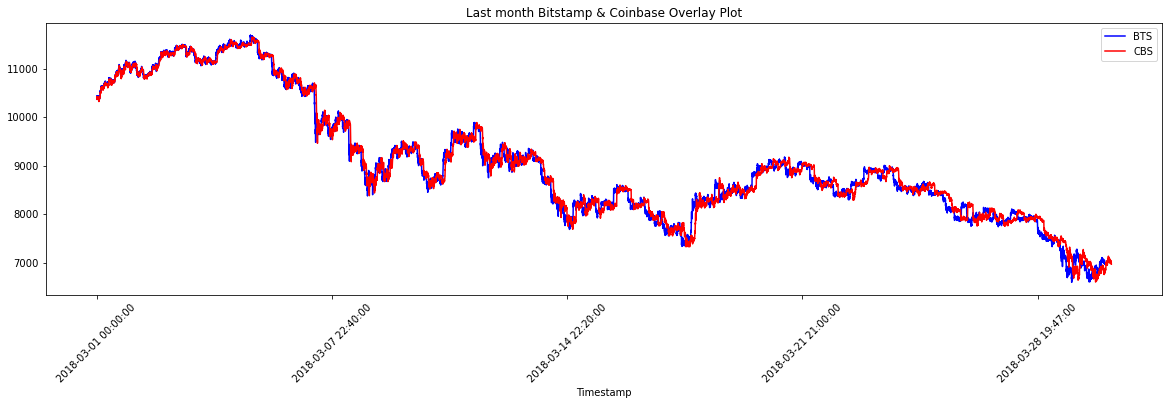

In [26]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp["Close"].loc["2018-03-01":"2018-03-31"].plot(legend = True, figsize=(20,5), title="Last month Bitstamp & Coinbase Overlay Plot", color="blue", label="BTS")
coinbase["Close"].loc["2018-03-01":"2018-03-31"].plot(legend = True, figsize=(20,5), color="red", label="CBS", rot = 45)

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes the degree of spread has progressed, however it's very narrow.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'2018-01-10 Overlay Plot'}, xlabel='Timestamp'>

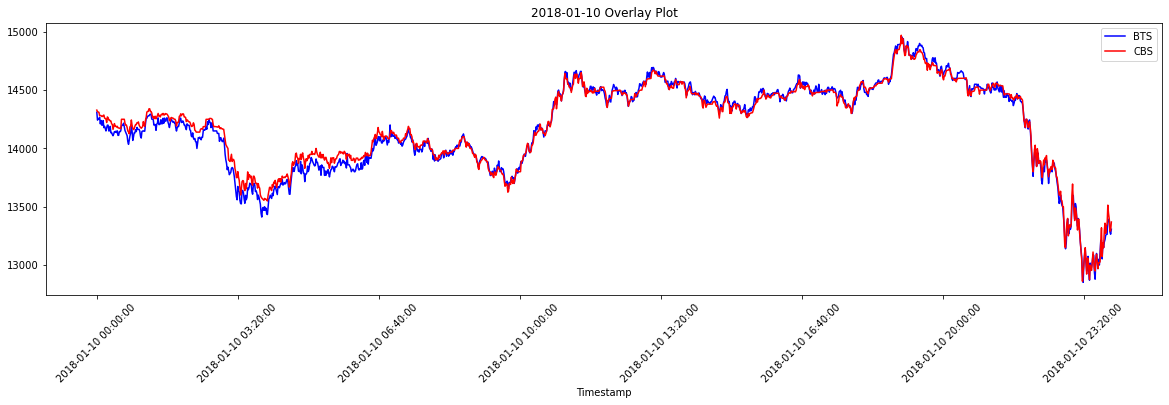

In [27]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc["2018-01-10 00:00:00":"2018-01-10 23:59:59"].plot(legend = True, figsize=(20,5), title="2018-01-10 Overlay Plot", color="blue", label="BTS")
coinbase["Close"].loc["2018-01-10 00:00:00":"2018-01-10 23:59:59"].plot(legend = True, figsize=(20,5), color="red", label="CBS", rot = 45)

In [28]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase["Close"].loc["2018-01-10 00:00:00":"2018-01-10 23:59:59"] - bitstamp["Close"].loc["2018-01-10 00:00:00":"2018-01-10 23:59:59"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

<AxesSubplot:>

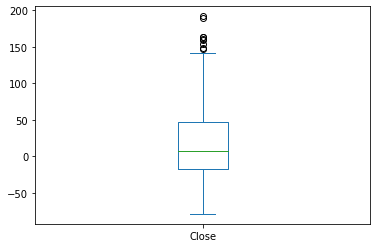

In [29]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind = "box")

<AxesSubplot:title={'center':'2018-02-10 Overlay Plot'}, xlabel='Timestamp'>

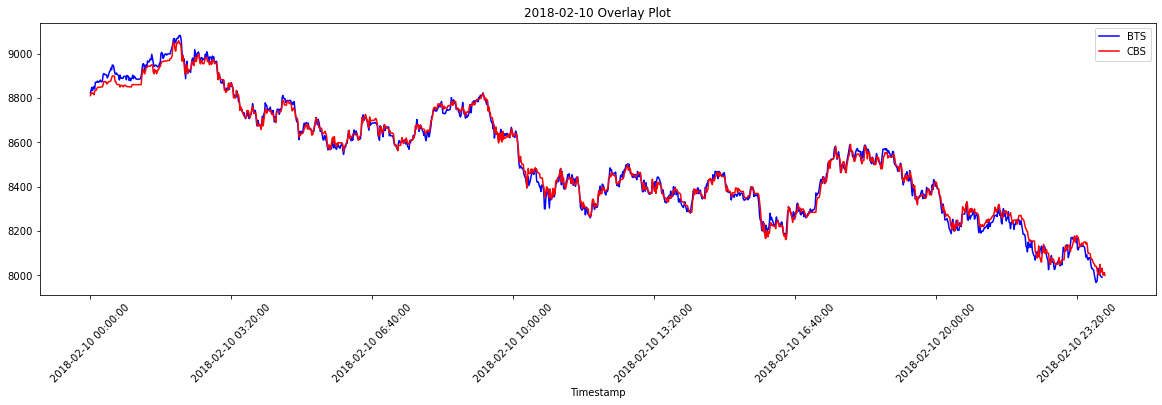

In [30]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc["2018-02-10 00:00:00":"2018-02-10 23:59:59"].plot(legend = True, figsize=(20,5), title="2018-02-10 Overlay Plot", color="blue", label="BTS")
coinbase["Close"].loc["2018-02-10 00:00:00":"2018-02-10 23:59:59"].plot(legend = True, figsize=(20,5), color="red", label="CBS", rot = 45)

In [31]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase["Close"].loc["2018-02-10 00:00:00":"2018-02-10 23:59:59"] - bitstamp["Close"].loc["2018-02-10 00:00:00":"2018-02-10 23:59:59"]


# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean       -0.364930
std        18.745766
min       -56.130000
25%       -12.657500
50%         0.010000
75%        12.180000
max        74.540000
Name: Close, dtype: float64

<AxesSubplot:>

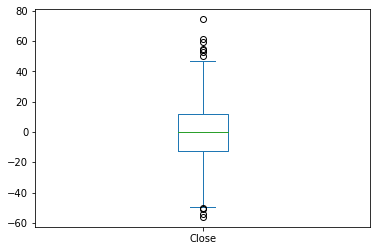

In [32]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind = "box")

<AxesSubplot:title={'center':'2018-03-10 Overlay Plot'}, xlabel='Timestamp'>

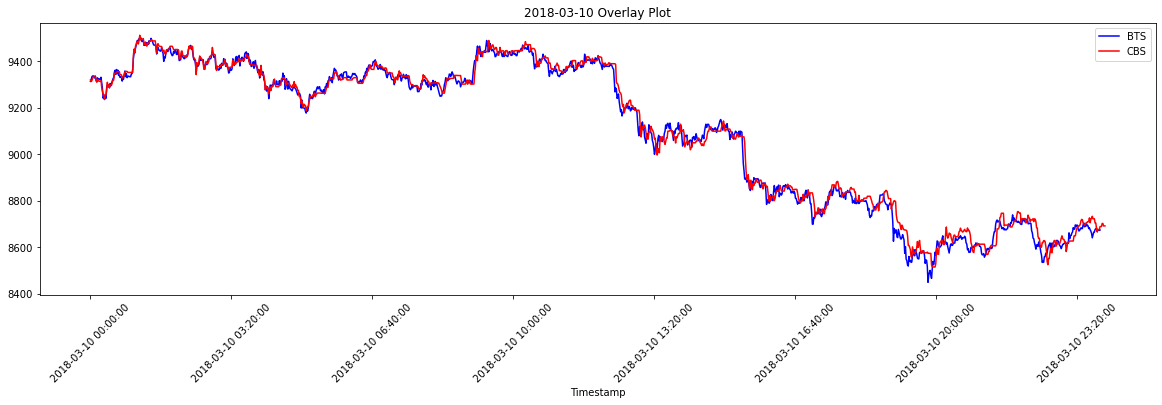

In [33]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp["Close"].loc["2018-03-10 00:00:00":"2018-03-10 23:59:59"].plot(legend = True, figsize=(20,5), title="2018-03-10 Overlay Plot", color="blue", label="BTS")
coinbase["Close"].loc["2018-03-10 00:00:00":"2018-03-10 23:59:59"].plot(legend = True, figsize=(20,5), color="red", label="CBS", rot = 45)

In [34]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase["Close"].loc["2018-03-10 00:00:00":"2018-03-10 23:59:59"] - bitstamp["Close"].loc["2018-03-10 00:00:00":"2018-03-10 23:59:59"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1433.000000
mean        6.541417
std        15.953638
min       -36.860000
25%        -4.240000
50%         7.170000
75%        16.040000
max        93.180000
Name: Close, dtype: float64

<AxesSubplot:>

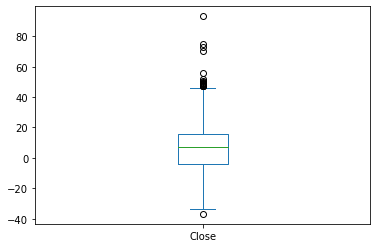

In [35]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind = "box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [36]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase["Close"].loc["2018-01-10 00:00:00":"2018-01-10 23:59:59"] - bitstamp["Close"].loc["2018-01-10 00:00:00":"2018-01-10 23:59:59"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0 ].describe()

count    810.000000
mean      47.239704
std       35.729720
min        0.010000
25%       17.377500
50%       39.970000
75%       70.665000
max      192.000000
Name: Close, dtype: float64

In [37]:
arbitrage_spread_middle = coinbase["Close"].loc["2018-02-10 00:00:00":"2018-02-10 23:59:59"] - bitstamp["Close"].loc["2018-02-10 00:00:00":"2018-02-10 23:59:59"]
arbitrage_spread_middle[arbitrage_spread_middle > 0 ].describe()

count    722.000000
mean      14.539224
std       10.859855
min        0.010000
25%        6.042500
50%       12.170000
75%       20.652500
max       74.540000
Name: Close, dtype: float64

In [38]:
arbitrage_spread_late = coinbase["Close"].loc["2018-03-10 00:00:00":"2018-03-10 23:59:59"] - bitstamp["Close"].loc["2018-03-10 00:00:00":"2018-03-10 23:59:59"]
arbitrage_spread_late[arbitrage_spread_late > 0 ].describe()

count    963.000000
mean      15.001890
std       11.349685
min        0.010000
25%        7.025000
50%       12.660000
75%       19.985000
max       93.180000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [39]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0 ] / bitstamp["Close"].loc["2018-01-10 00:00:00":"2018-01-10 23:59:59"]

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-10 00:00:00    0.001297
2018-01-10 00:01:00    0.005037
2018-01-10 00:02:00    0.003852
2018-01-10 00:03:00    0.004211
2018-01-10 00:04:00    0.001005
Name: Close, dtype: float64

In [40]:
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle > 0 ] / bitstamp["Close"].loc["2018-02-10 00:00:00":"2018-02-10 23:59:59"]
spread_return_middle.head()

Timestamp
2018-02-10 00:00:00   NaN
2018-02-10 00:01:00   NaN
2018-02-10 00:02:00   NaN
2018-02-10 00:03:00   NaN
2018-02-10 00:04:00   NaN
Name: Close, dtype: float64

In [41]:
spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0 ] / bitstamp["Close"].loc["2018-03-10 00:00:00":"2018-03-10 23:59:59"]
spread_return_late.head()

Timestamp
2018-03-10 00:00:00    0.000631
2018-03-10 00:01:00         NaN
2018-03-10 00:02:00         NaN
2018-03-10 00:03:00         NaN
2018-03-10 00:04:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [42]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-10 02:22:00    0.010001
2018-01-10 03:04:00    0.010719
2018-01-10 03:05:00    0.013895
2018-01-10 03:06:00    0.011597
2018-01-10 03:17:00    0.011663
Name: Close, dtype: float64

In [43]:
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_middle.head()
# No profitable trade where the spread return is greater than 1% on 2018-02-10

Series([], Name: Close, dtype: float64)

In [44]:
profitable_trades_late = spread_return_late[spread_return_late > .01]
profitable_trades_late.head()

Timestamp
2018-03-10 19:04:00    0.010801
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [49]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    14.000000
mean      0.011375
std       0.001300
min       0.010001
25%       0.010540
50%       0.010963
75%       0.011913
max       0.014012
Name: Close, dtype: float64

In [50]:
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [47]:
profitable_trades_late.describe()

count    1.000000
mean     0.010801
std           NaN
min      0.010801
25%      0.010801
50%      0.010801
75%      0.010801
max      0.010801
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [51]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp["Close"].loc["2018-01-10 00:00:00":"2018-01-10 23:59:59"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-10 02:22:00    140.01
2018-01-10 03:04:00    148.70
2018-01-10 03:05:00    192.00
2018-01-10 03:06:00    160.49
2018-01-10 03:17:00    159.10
2018-01-10 03:18:00    163.00
2018-01-10 03:19:00    190.00
2018-01-10 03:34:00    137.13
2018-01-10 03:53:00    141.01
2018-01-10 03:54:00    163.00
2018-01-10 05:00:00    138.89
2018-01-10 05:18:00    147.64
2018-01-10 05:25:00    154.28
2018-01-10 23:50:00    141.35
Name: Close, dtype: float64

In [73]:
profit_middle = profitable_trades_middle * bitstamp["Close"].loc["2018-02-10 00:00:00":"2018-02-10 23:59:59"]
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [72]:
profit_late = profitable_trades_late * bitstamp["Close"].loc["2018-03-10 00:00:00":"2018-03-10 23:59:59"]
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

Timestamp
2018-03-10 19:04:00    93.18
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [74]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     14.000000
mean     155.471429
std       17.641360
min      137.130000
25%      141.095000
50%      151.490000
75%      162.372500
max      192.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Profit per trade date'}, xlabel='Timestamp'>

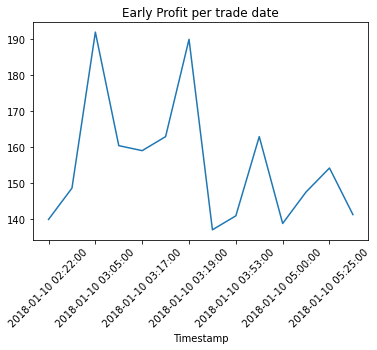

In [58]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title = "Early Profit per trade date", rot = 45)

<AxesSubplot:title={'center':'Middle Profit per trade date'}, xlabel='Timestamp'>

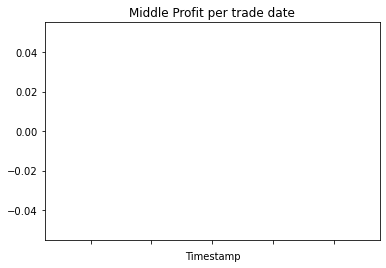

In [75]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(title = "Middle Profit per trade date", rot = 45)
# There is no profit per trade on 2018-02-10

<AxesSubplot:title={'center':'Late Profit per trade date'}, xlabel='Timestamp'>

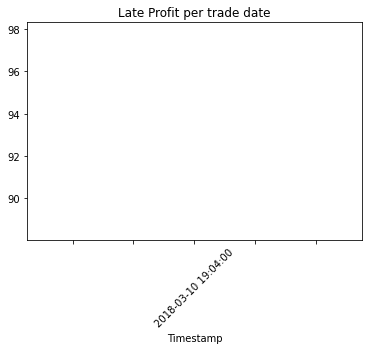

In [76]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_late.plot(title = "Late Profit per trade date", rot = 45)
# There is only a single profit per trade on 2018-03-10 and not enough to plot a graph.

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [77]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

2176.600000000002

In [78]:
profit_per_trade_middle.sum()

0.0

In [79]:
profit_per_trade_late.sum()

93.18000000000029

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [80]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

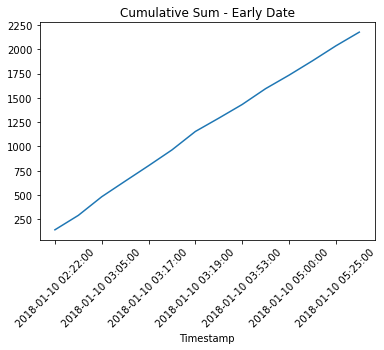

In [81]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title = "Cumulative Sum - Early Date", rot = 45)

In [68]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Middle Date'}, xlabel='Timestamp'>

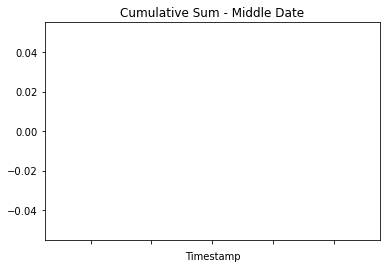

In [69]:
cumulative_profit_middle.plot(title = "Cumulative Sum - Middle Date")
# There is no cumulative profit on 2018-02-10

In [82]:
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Late Date'}, xlabel='Timestamp'>

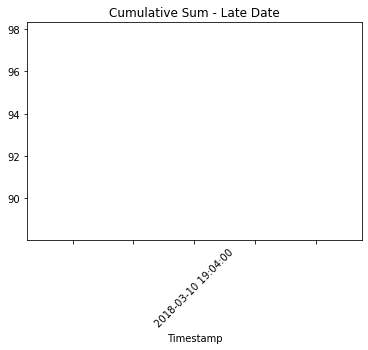

In [84]:
cumulative_profit_late.plot(title = "Cumulative Sum - Late Date", rot = 45)
# There is only a single cumulative profit on 2018-03-10 and not enough to plot a graph.

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** There was a profit at the initial stage but arbitrage profit went from $2176.60 to $0 to $93.18. This shows that overtime the the prices of the coinbase & bitstamp trades became almost the same thereby reducing the arbitrage opportunites. As the demand for the lower-priced bitstamp rises, so does the price. Eventually, the price is in sync with that of coinbase.